### Reading .tsv into pandas DataFrame

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting Data from SkincareAddiction Submissions

In [3]:
SkincareSubData = pd.read_table("SkincareSubs.tsv", sep='\t', engine='python', quoting=csv.QUOTE_NONE)

In [4]:
SkincareSubData.shape

(556106, 8)

In [5]:
SkincareSubData["new_time"] = pd.to_datetime(SkincareSubData["created_utc"], errors="coerce")

In [6]:
SCTableOne = SkincareSubData["title"]

In [7]:
SCTableOne.index = SkincareSubData["new_time"]

In [8]:
SCDataframe = SCTableOne.resample("Y").count()

In [29]:
SCDataframe

2019    125785
2020    162318
2021    134984
2022    132935
Name: title, dtype: int64

In [28]:
SCDataframe.index = [2019, 2020, 2021, 2022]

<Axes: xlabel='Year', ylabel='No. of yearly submissions'>

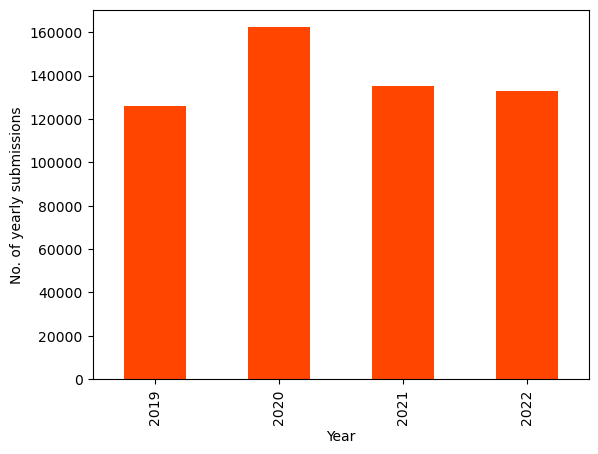

In [38]:
SCDataframe.plot.bar(color="#ff4500", xlabel="Year", ylabel="No. of yearly submissions")

In [32]:
SCSubmissionsM = SCTableOne.resample("M").count()

In [33]:
SCSubmissionsM.index = ["Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019", "Jul 2019", "Aug 2019", "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019", "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "Jul 2020", "Aug 2020", "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021", "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022"]

<Axes: xlabel='Months 2019-2022', ylabel='No. of monthly submissions'>

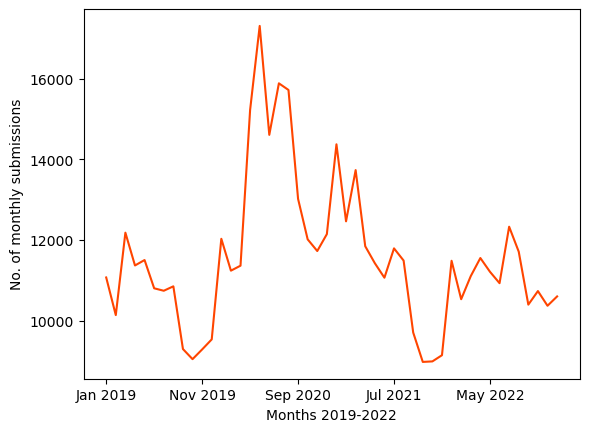

In [37]:
SCSubmissionsM.plot.line(color="#ff4500", xlabel="Months 2019-2022", ylabel="No. of monthly submissions")

### Extract submissions with "What"

In [39]:
SkincareSubData['selftext'] = SkincareSubData['selftext'].fillna('')

In [40]:
SkincareSubData["selftext_what"] = SkincareSubData['selftext'].str.contains('what', case=False)

In [41]:
SkincareSubData["selftext_what"].value_counts()

False    514068
True      42038
Name: selftext_what, dtype: int64

In [42]:
SkincareSubData['num_comments'].value_counts()

1.0       241747
0.0        77937
2.0        45909
3.0        33987
4.0        26463
           ...  
615.0          1
1234.0         1
372.0          1
495.0          1
467.0          1
Name: num_comments, Length: 524, dtype: int64

In [43]:
WhatSubmissions = SkincareSubData[SkincareSubData.selftext_what == True]

In [44]:
WhatSubmissions.shape

(42038, 10)

##### NotWhatSubmissions.shape

### Extract submissions without "What"

In [134]:
NotWhatSubmissions = SkincareSubData[SkincareSubData.selftext_what == False]

In [56]:
TotalComments_WhatSubs = WhatSubmissions["num_comments"].sum()
AverageComments_WhatSubs = TotalComments_WhatSubs / len(WhatSubmissions["num_comments"])
print("TotalComments_WhatSubs: ", TotalComments_WhatSubs)
print("AverageComments_WhatSubs: ", AverageComments_WhatSubs)

TotalComments_WhatSubs:  408717.0
AverageComments_WhatSubs:  9.722560540463391


In [57]:
TotalComments_NotWhatSubs = NotWhatSubmissions["num_comments"].sum()
AverageComments_NotWhatSubs = TotalComments_NotWhatSubs / len(NotWhatSubmissions["num_comments"])
print("TotalComments_NotWhatSubs: ", TotalComments_NotWhatSubs)
print("AverageComments_NotWhatSubs: ", AverageComments_NotWhatSubs)

TotalComments_NotWhatSubs:  2470854.0
AverageComments_NotWhatSubs:  4.806473073601158


<Axes: xlabel='Submissions with and without the word "what"'>

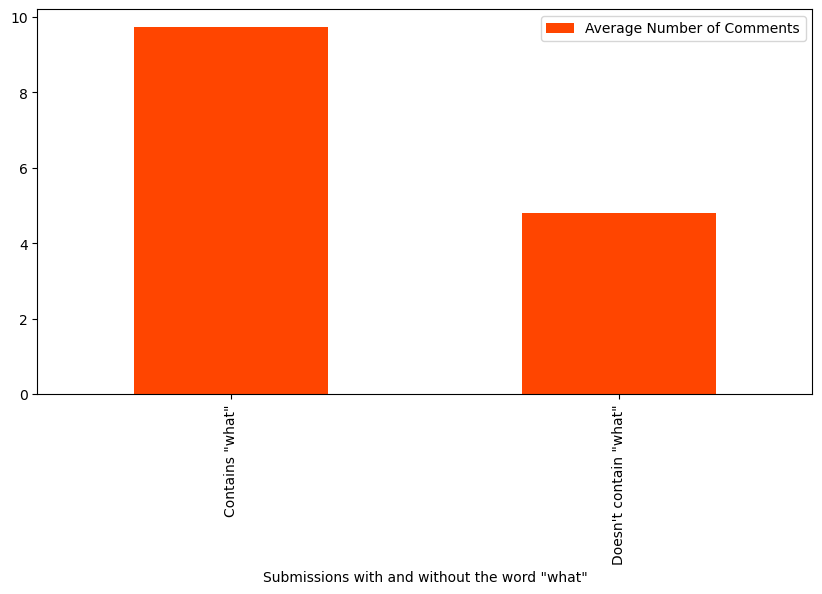

In [54]:
AverageComments = {'Submissions with and without the word "what"' : ["Contains \"what\"", "Doesn't contain \"what\""], 'Average Number of Comments' : [AverageComments_WhatSubs, AverageComments_NotWhatSubs]}
AverageDF = pd.DataFrame(AverageComments)
AverageDF.plot.bar(color = "#ff4500", x = 'Submissions with and without the word "what"', y = "Average Number of Comments", figsize=(10, 5))

### Alternate graph, see if you like it

<Axes: ylabel='Submissions with and without the word "what"'>

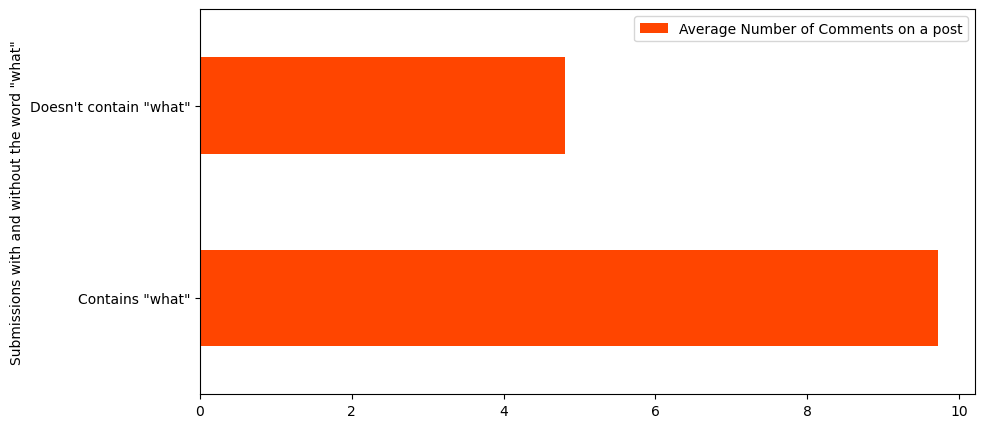

In [59]:
AverageComments = {'Submissions with and without the word "what"' : ["Contains \"what\"", "Doesn't contain \"what\""], 'Average Number of Comments on a post' : [AverageComments_WhatSubs, AverageComments_NotWhatSubs]}
AverageDF = pd.DataFrame(AverageComments)
AverageDF.plot(kind="barh", color = "#ff4500", x = 'Submissions with and without the word "what"', y = "Average Number of Comments on a post", figsize=(10, 5))

In [61]:
WhatSubmissions.to_csv("what.csv")

In [62]:
NotWhatSubmissions.shape

(514068, 10)

In [63]:
WhatSubmissions["new_time"] = pd.to_datetime(WhatSubmissions["created_utc"], errors="coerce")

/var/folders/4z/2cqvncmj7sg9bbqtyzp8hks40000gn/T/ipykernel_28603/139796896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WhatSubmissions["new_time"] = pd.to_datetime(WhatSubmissions["created_utc"], errors="coerce")


In [64]:
NotWhatSubmissions["new_time"] = pd.to_datetime(NotWhatSubmissions["created_utc"], errors="coerce")

/var/folders/4z/2cqvncmj7sg9bbqtyzp8hks40000gn/T/ipykernel_28603/2306268802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotWhatSubmissions["new_time"] = pd.to_datetime(NotWhatSubmissions["created_utc"], errors="coerce")


In [65]:
NotWhatSubmissionsTable = NotWhatSubmissions["selftext"]

In [66]:
NotWhatSubmissionsTable.index = NotWhatSubmissions["new_time"]

In [67]:
NotWhatSubs = NotWhatSubmissionsTable.resample("1D").count()

In [68]:
NotWhatSubs_2022 = NotWhatSubs[-365:]

<Axes: xlabel='Months'>

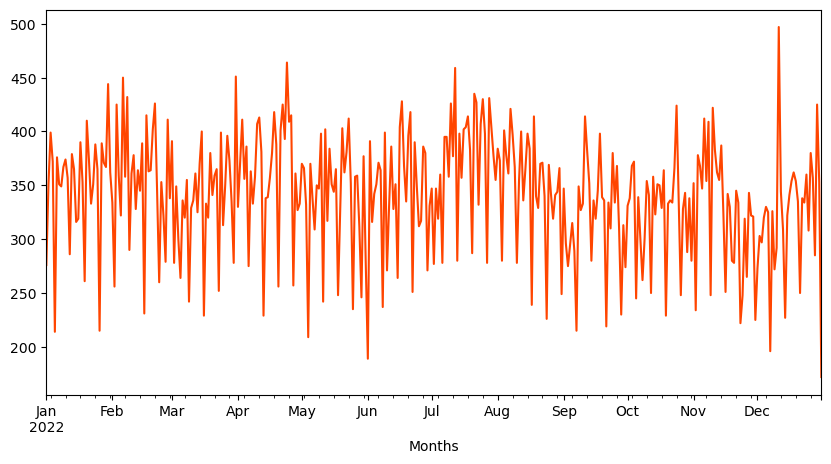

In [70]:
NotWhatSubs_2022.plot(color="#ff4500", figsize=(10, 5), xlabel="Months")

In [72]:
WhatSubmissionsTable = WhatSubmissions["selftext"]

In [73]:
WhatSubmissionsTable.index = WhatSubmissions["new_time"]

In [74]:
WhatSubs = WhatSubmissionsTable.resample("1D").count()

In [75]:
WhatSubs_2022 = WhatSubs[-365:]

<Axes: xlabel='Months'>

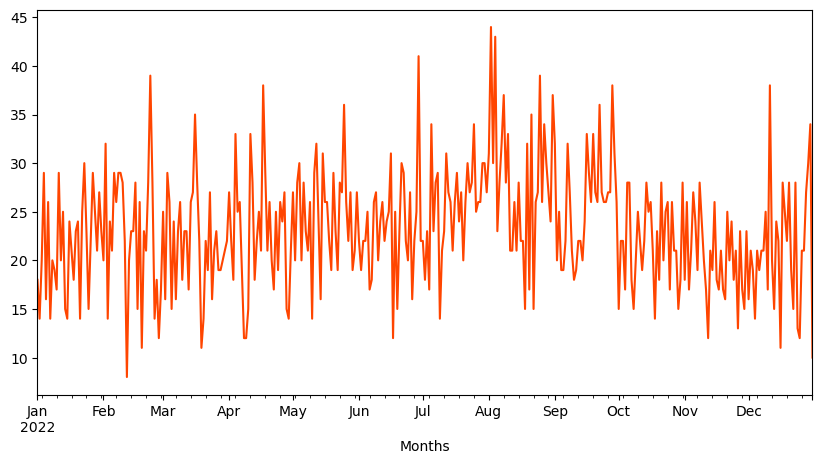

In [76]:
WhatSubs_2022.plot(color="#ff4500", figsize=(10, 5), xlabel="Months")

### Word cloud of Skincare Subs

In [60]:
SkincareSubData['selftext'].isna().sum()

0

#### Join words into one variable

In [61]:
SkincareSelfText = SkincareSubData["selftext"].str.cat(sep="")

#### Replace stopwords from the text

In [62]:
stopwords = ["removed", "deleted", "reddit", "skin", "amp",  "x200B"]

for word in stopwords:
    SkincareSelfText = SkincareSelfText.replace(word, "")

#### Create wordcloud and plot

In [63]:
Skincare_WordCloud = WordCloud(collocations=True, background_color="white", width=800, height=400).generate(SkincareSelfText)

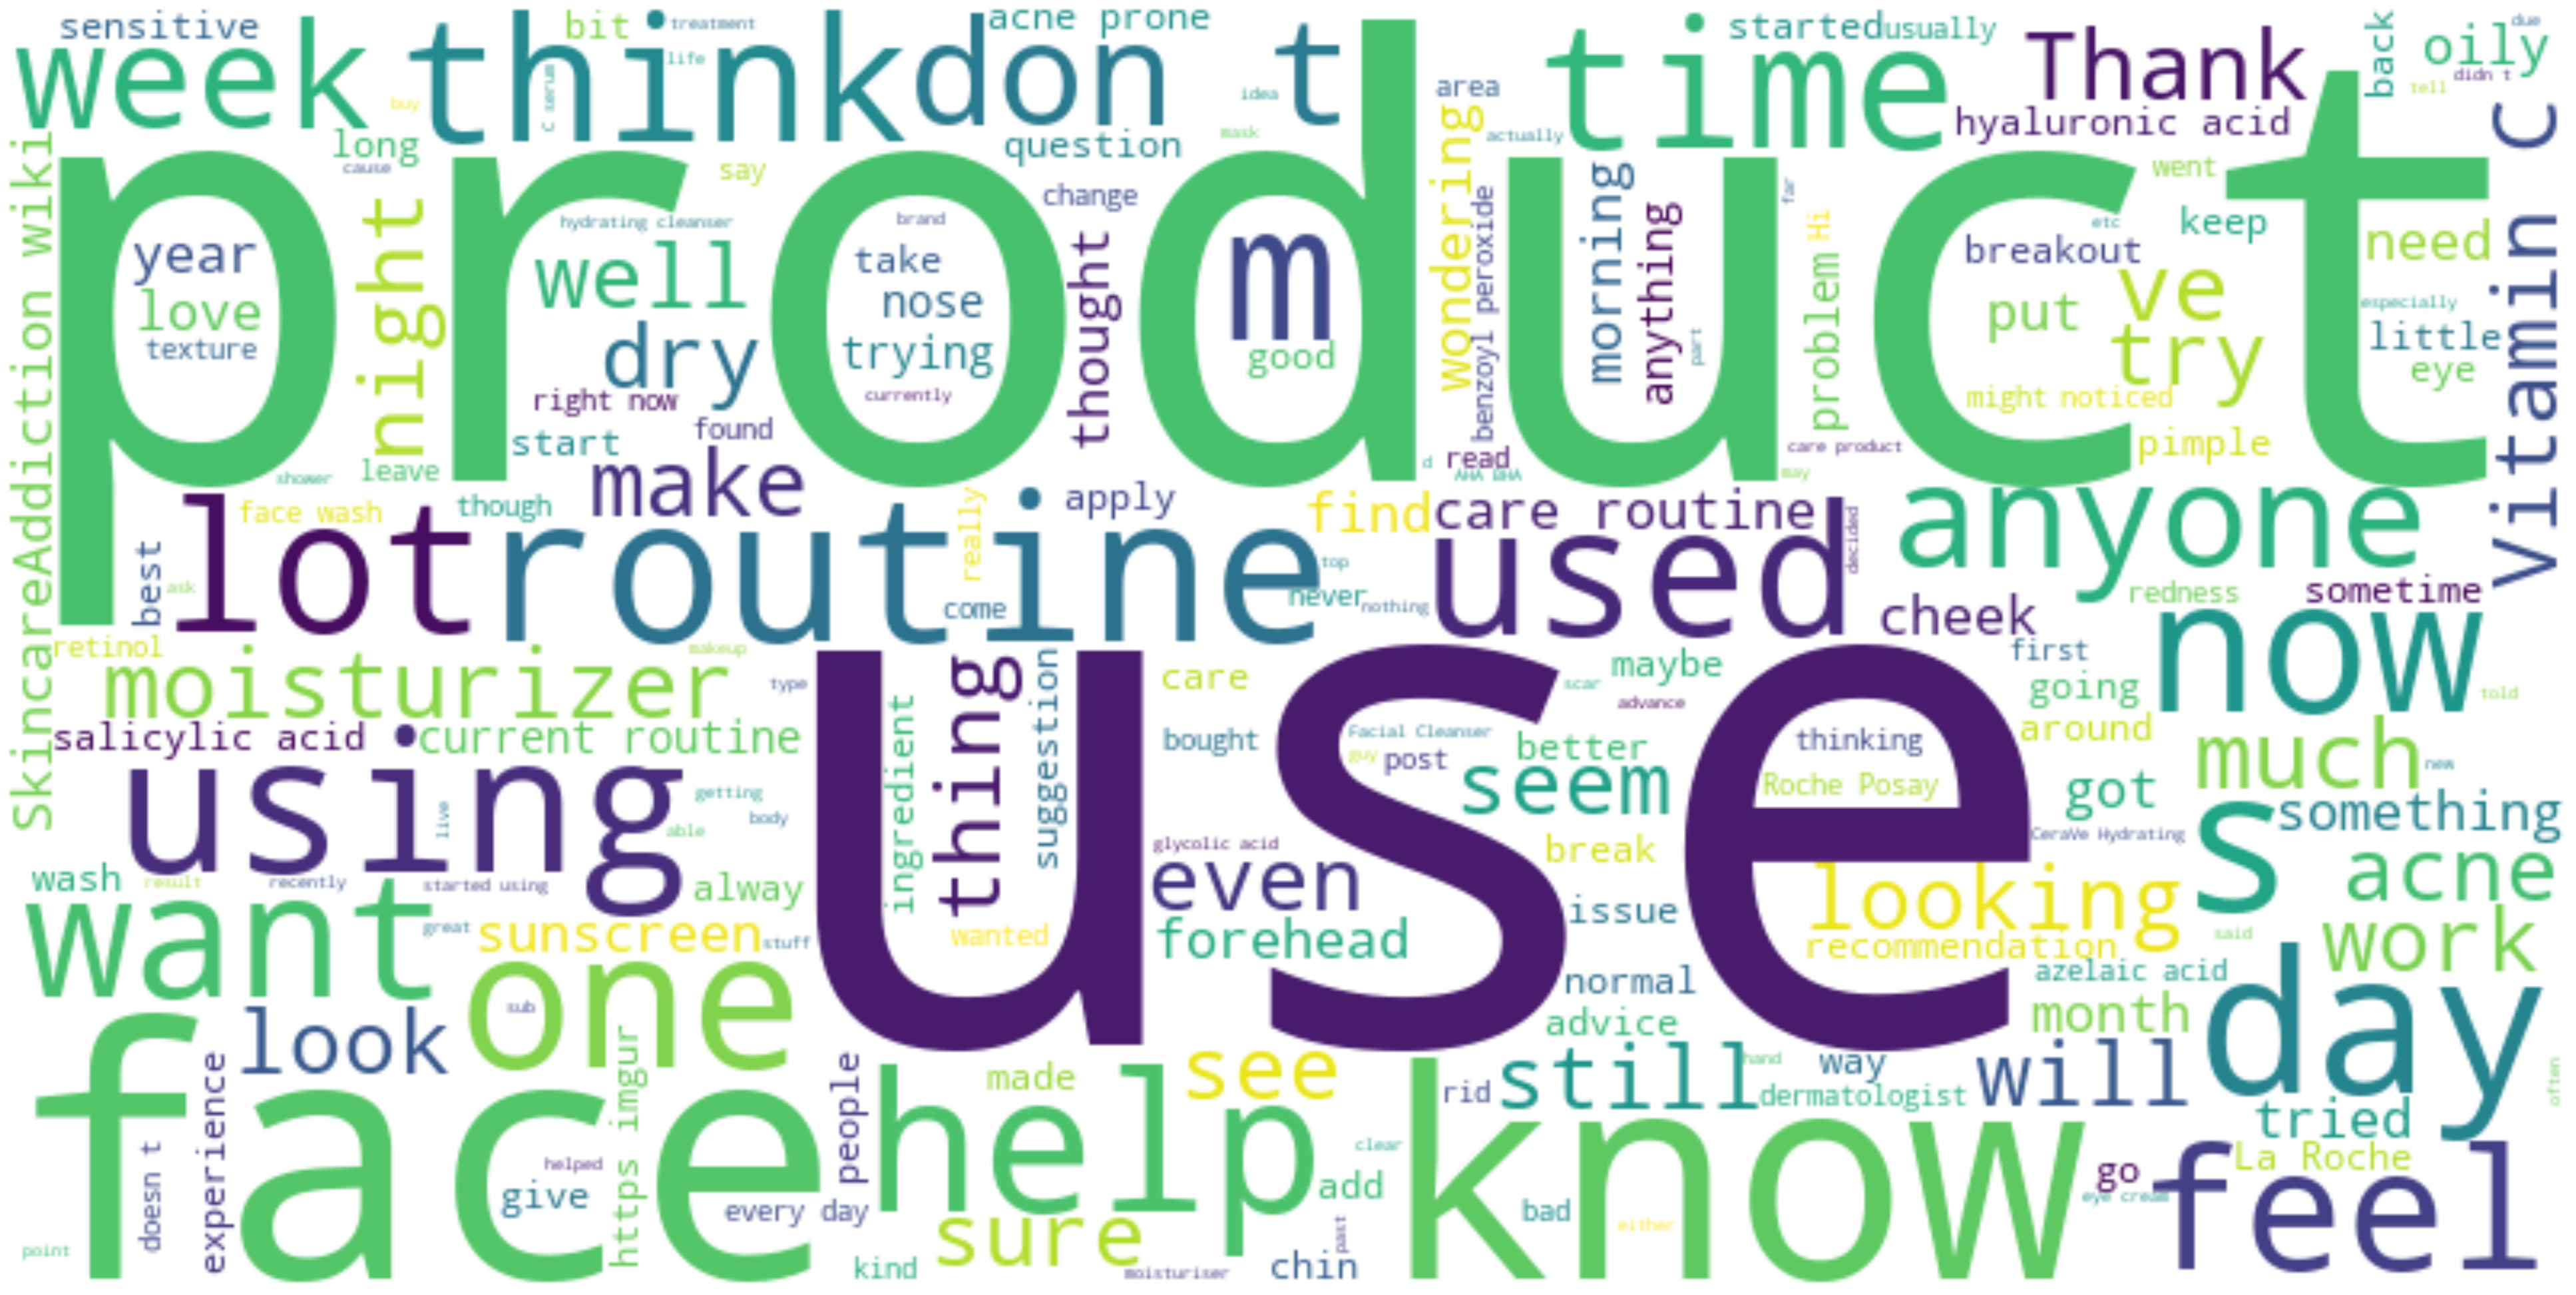

In [64]:
fig2 = plt.figure(figsize = (50, 25))
ax = fig2.add_subplot(111)

ax.imshow(Skincare_WordCloud, interpolation="bilinear")
ax.axis("off")
plt.show()

### Getting Data from MakeupAddiction Submissions

In [77]:
MakeupSubData = pd.read_table("MakeupSubs.tsv", sep='\t', engine='python', quoting=csv.QUOTE_NONE)

In [78]:
MakeupSubData["new_time"] = pd.to_datetime(SkincareSubData["created_utc"], errors="coerce")

In [79]:
MUTableOne = MakeupSubData["title"]

In [80]:
MUTableOne.index = MakeupSubData["new_time"]

In [81]:
MUSubmissions = MUTableOne.resample("Y").count()

MUSubmissions

new_time
2019-12-31    125775
2020-12-31     57373
Name: title, dtype: int64

### Getting Data from HomeDecorating Submissions

In [88]:
HomeSubData = pd.read_table("HomeSubs.tsv", sep='\t', engine='python', quoting=csv.QUOTE_NONE)

In [90]:
HomeSubData["new_time"] = pd.to_datetime(HomeSubData["created_utc"], errors="coerce")

In [91]:
HomeSubData.set_index('new_time', inplace=True)

In [92]:
HomeSubData.head()

url created_utc  \
new_time                                                                    
2019-01-01  https://mobile.twitter.com/LarondusR/status/10...  01-01-2019   
2019-01-01                https://i.redd.it/ep5wbd89zr721.jpg  01-01-2019   
2019-01-01  https://mobile.twitter.com/SagarKiDiary/status...  01-01-2019   
2019-01-01  https://mobile.twitter.com/SagarKiDiary/status...  01-01-2019   
2019-01-01                        https://www.weknowrugs.com/  01-01-2019   

                 subreddit                                              title  \
new_time                                                                        
2019-01-01  HomeDecorating  @LarondusR : RT SinghBrosWWE: Victorious. Now,...   
2019-01-01  HomeDecorating                5 BEST TIPS FOR INTERIOR DECORATION   
2019-01-01  HomeDecorating  @SagarKiDiary : Happy new year 2019 https://t....   
2019-01-01  HomeDecorating  @SagarKiDiary : Pinned to HOT SCHMALTZ on @Pin...   
2019-01-01  HomeDecorating                   We Know Rugs-USA Best Rugs Store   

           selftext  num_comments  ups subreddit_id  
new_time                                             
2019-01-01      NaN           0.0  NaN     t5_2t8de  
2019-01-01      NaN           0.0  NaN     t5_2t8de  
2019-01-01      NaN           1.0  NaN     t5_2t8de  
2019-01-01      NaN           1.0  NaN     t5_2t8de  
2019-01-01      NaN           1.0  NaN     t5_2t8de

In [93]:
date_range_data = HomeSubData.loc['2020-11-01':'2021-01-30']

In [94]:
date_range_data.to_csv("Curious.csv")

In [95]:
date_range_data

url created_utc  \
new_time                                                                    
2020-11-01                https://i.redd.it/iwqcfscpulw51.jpg  11-01-2020   
2020-11-01                https://i.redd.it/x5czafefhmw51.jpg  11-01-2020   
2020-11-01              https://www.reddit.com/gallery/jm480x  11-01-2020   
2020-11-01                https://i.redd.it/ny7fs1opinw51.jpg  11-01-2020   
2020-11-01              https://www.reddit.com/gallery/jm4mup  11-01-2020   
...                                                       ...         ...   
2021-01-30  https://mobile.twitter.com/Only_rock_radio/sta...  01-30-2021   
2021-01-30  https://mobile.twitter.com/Only_rock_radio/sta...  01-30-2021   
2021-01-30  https://mobile.twitter.com/Only_rock_radio/sta...  01-30-2021   
2021-01-30  https://mobile.twitter.com/Only_rock_radio/sta...  01-30-2021   
2021-01-30  https://mobile.twitter.com/Only_rock_radio/sta...  01-30-2021   

                 subreddit                                              title  \
new_time                                                                        
2020-11-01  HomeDecorating    Round or rectangle dining table for this space?   
2020-11-01  HomeDecorating  You guys always give the best advice! so I wan...   
2020-11-01  HomeDecorating  What accent chair compliments the grey sofa be...   
2020-11-01  HomeDecorating  https://www.etsy.com/listing/882526270/pendant...   
2020-11-01  HomeDecorating  Hey experts ! I really need tips on how I can ...   
...                    ...                                                ...   
2021-01-30  HomeDecorating  @Only_rock_radio : If life is a radio, turn up...   
2021-01-30  HomeDecorating  @Only_rock_radio : Music, music and music all ...   
2021-01-30  HomeDecorating  @Only_rock_radio : Great unsigned music. Now B...   
2021-01-30  HomeDecorating  @Only_rock_radio : Do you need new music? Now ...   
2021-01-30  HomeDecorating  @Only_rock_radio : Listen now DemonFace by Gra...   

             selftext  num_comments  ups subreddit_id  
new_time                                               
2020-11-01  [deleted]           2.0  NaN     t5_2t8de  
2020-11-01        NaN           5.0  NaN     t5_2t8de  
2020-11-01  [deleted]           4.0  NaN     t5_2t8de  
2020-11-01        NaN           0.0  NaN     t5_2t8de  
2020-11-01  [deleted]          25.0  NaN     t5_2t8de  
...               ...           ...  ...          ...  
2021-01-30        NaN           0.0  NaN     t5_2t8de  
2021-01-30        NaN           0.0  NaN     t5_2t8de  
2021-01-30        NaN           0.0  NaN     t5_2t8de  
2021-01-30        NaN           0.0  NaN     t5_2t8de  
2021-01-30        NaN           0.0  NaN     t5_2t8de  

[43540 rows x 8 columns]

In [96]:
HomeSubData

url created_utc  \
new_time                                                                    
2019-01-01  https://mobile.twitter.com/LarondusR/status/10...  01-01-2019   
2019-01-01                https://i.redd.it/ep5wbd89zr721.jpg  01-01-2019   
2019-01-01  https://mobile.twitter.com/SagarKiDiary/status...  01-01-2019   
2019-01-01  https://mobile.twitter.com/SagarKiDiary/status...  01-01-2019   
2019-01-01                        https://www.weknowrugs.com/  01-01-2019   
...                                                       ...         ...   
2022-12-31                                                NaN  12-31-2022   
2022-12-31                                                NaN  12-31-2022   
2022-12-31                       https://youtu.be/OxBbTyPUkfg  12-31-2022   
2022-12-31             https://www.reddit.com/gallery/1005l2a  12-31-2022   
2022-12-31  https://www.ebay.ca/itm/334685491537?mkcid=16&...  12-31-2022   

                 subreddit                                              title  \
new_time                                                                        
2019-01-01  HomeDecorating  @LarondusR : RT SinghBrosWWE: Victorious. Now,...   
2019-01-01  HomeDecorating                5 BEST TIPS FOR INTERIOR DECORATION   
2019-01-01  HomeDecorating  @SagarKiDiary : Happy new year 2019 https://t....   
2019-01-01  HomeDecorating  @SagarKiDiary : Pinned to HOT SCHMALTZ on @Pin...   
2019-01-01  HomeDecorating                   We Know Rugs-USA Best Rugs Store   
...                    ...                                                ...   
2022-12-31  HomeDecorating  Need help choosing accent color for couch thro...   
2022-12-31  HomeDecorating                      Help me - Mountable Coat Rack   
2022-12-31  HomeDecorating  Cutting up Monstera Deliciosa: WHEN AND HOW TO...   
2022-12-31  HomeDecorating                      help with my huge living room   
2022-12-31  HomeDecorating  Fitz &amp; Floyd Monkey Jungle Sugar And Cream...   

             selftext  num_comments  ups subreddit_id  
new_time                                               
2019-01-01        NaN           0.0  NaN     t5_2t8de  
2019-01-01        NaN           0.0  NaN     t5_2t8de  
2019-01-01        NaN           1.0  NaN     t5_2t8de  
2019-01-01        NaN           1.0  NaN     t5_2t8de  
2019-01-01        NaN           1.0  NaN     t5_2t8de  
...               ...           ...  ...          ...  
2022-12-31  [deleted]           2.0  NaN     t5_2t8de  
2022-12-31  [deleted]           3.0  NaN     t5_2t8de  
2022-12-31        NaN           0.0  NaN     t5_2t8de  
2022-12-31        NaN          80.0  NaN     t5_2t8de  
2022-12-31        NaN           0.0  NaN     t5_2t8de  

[103075 rows x 8 columns]

In [97]:
HomeTableOne = HomeSubData["title"]

In [99]:
HomeTableOne.index = HomeSubData.index

In [100]:
HomeSubmissions = HomeTableOne.resample("Y").count()

HomeSubmissions

new_time
2019-12-31     9277
2020-12-31    39651
2021-12-31    35116
2022-12-31    19030
Name: title, dtype: int64

In [101]:
HomeSubmissions.index = [2019, 2020, 2021, 2022]

<Axes: xlabel='Year', ylabel='No. of submissions'>

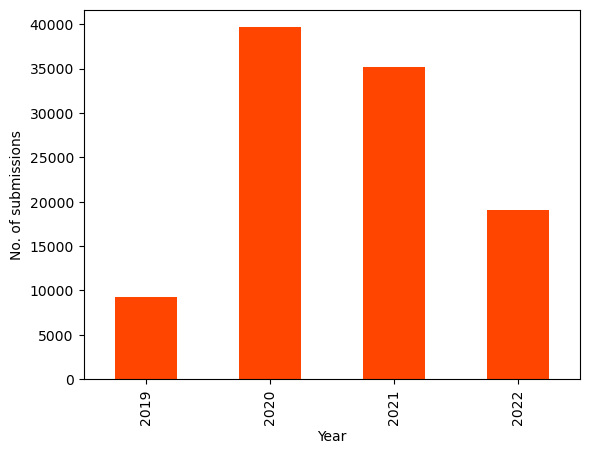

In [103]:
HomeSubmissions.plot.bar(color="#ff4500", xlabel="Year", ylabel="No. of submissions")

In [104]:
HomeSubData["selftext_spam"] = HomeSubData['title'].str.contains('@Only_rock_radio', case=False)

In [105]:
HomeSubData

url created_utc  \
new_time                                                                    
2019-01-01  https://mobile.twitter.com/LarondusR/status/10...  01-01-2019   
2019-01-01                https://i.redd.it/ep5wbd89zr721.jpg  01-01-2019   
2019-01-01  https://mobile.twitter.com/SagarKiDiary/status...  01-01-2019   
2019-01-01  https://mobile.twitter.com/SagarKiDiary/status...  01-01-2019   
2019-01-01                        https://www.weknowrugs.com/  01-01-2019   
...                                                       ...         ...   
2022-12-31                                                NaN  12-31-2022   
2022-12-31                                                NaN  12-31-2022   
2022-12-31                       https://youtu.be/OxBbTyPUkfg  12-31-2022   
2022-12-31             https://www.reddit.com/gallery/1005l2a  12-31-2022   
2022-12-31  https://www.ebay.ca/itm/334685491537?mkcid=16&...  12-31-2022   

                 subreddit                                              title  \
new_time                                                                        
2019-01-01  HomeDecorating  @LarondusR : RT SinghBrosWWE: Victorious. Now,...   
2019-01-01  HomeDecorating                5 BEST TIPS FOR INTERIOR DECORATION   
2019-01-01  HomeDecorating  @SagarKiDiary : Happy new year 2019 https://t....   
2019-01-01  HomeDecorating  @SagarKiDiary : Pinned to HOT SCHMALTZ on @Pin...   
2019-01-01  HomeDecorating                   We Know Rugs-USA Best Rugs Store   
...                    ...                                                ...   
2022-12-31  HomeDecorating  Need help choosing accent color for couch thro...   
2022-12-31  HomeDecorating                      Help me - Mountable Coat Rack   
2022-12-31  HomeDecorating  Cutting up Monstera Deliciosa: WHEN AND HOW TO...   
2022-12-31  HomeDecorating                      help with my huge living room   
2022-12-31  HomeDecorating  Fitz &amp; Floyd Monkey Jungle Sugar And Cream...   

             selftext  num_comments  ups subreddit_id  selftext_spam  
new_time                                                              
2019-01-01        NaN           0.0  NaN     t5_2t8de          False  
2019-01-01        NaN           0.0  NaN     t5_2t8de          False  
2019-01-01        NaN           1.0  NaN     t5_2t8de          False  
2019-01-01        NaN           1.0  NaN     t5_2t8de          False  
2019-01-01        NaN           1.0  NaN     t5_2t8de          False  
...               ...           ...  ...          ...            ...  
2022-12-31  [deleted]           2.0  NaN     t5_2t8de          False  
2022-12-31  [deleted]           3.0  NaN     t5_2t8de          False  
2022-12-31        NaN           0.0  NaN     t5_2t8de          False  
2022-12-31        NaN          80.0  NaN     t5_2t8de          False  
2022-12-31        NaN           0.0  NaN     t5_2t8de          False  

[103075 rows x 9 columns]

In [106]:
MHomeSubmissions = HomeTableOne.resample("M").count()

MHomeSubmissions

new_time
2019-01-31      830
2019-02-28      556
2019-03-31      666
2019-04-30      643
2019-05-31      755
2019-06-30     1002
2019-07-31     1232
2019-08-31      906
2019-09-30      756
2019-10-31      670
2019-11-30      663
2019-12-31      598
2020-01-31      908
2020-02-29      795
2020-03-31      791
2020-04-30      864
2020-05-31      846
2020-06-30     1084
2020-07-31     1357
2020-08-31     1758
2020-09-30     1698
2020-10-31     1257
2020-11-30    12782
2020-12-31    15511
2021-01-31    15766
2021-02-28     9517
2021-03-31     1003
2021-04-30      890
2021-05-31      859
2021-06-30      806
2021-07-31      947
2021-08-31     1023
2021-09-30     1135
2021-10-31     1115
2021-11-30     1077
2021-12-31      978
2022-01-31     1618
2022-02-28     1563
2022-03-31     1656
2022-04-30     1497
2022-05-31     1391
2022-06-30     1426
2022-07-31     1709
2022-08-31     1825
2022-09-30     1589
2022-10-31     1581
2022-11-30     1654
2022-12-31     1521
Name: title, dtype: int64

In [107]:
MHomeSubmissions.index = ["Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019", "Jul 2019", "Aug 2019", "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019", "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "Jul 2020", "Aug 2020", "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021", "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022"]

In [108]:
MHomeSubmissions

Jan 2019      830
Feb 2019      556
Mar 2019      666
Apr 2019      643
May 2019      755
Jun 2019     1002
Jul 2019     1232
Aug 2019      906
Sep 2019      756
Oct 2019      670
Nov 2019      663
Dec 2019      598
Jan 2020      908
Feb 2020      795
Mar 2020      791
Apr 2020      864
May 2020      846
Jun 2020     1084
Jul 2020     1357
Aug 2020     1758
Sep 2020     1698
Oct 2020     1257
Nov 2020    12782
Dec 2020    15511
Jan 2021    15766
Feb 2021     9517
Mar 2021     1003
Apr 2021      890
May 2021      859
Jun 2021      806
Jul 2021      947
Aug 2021     1023
Sep 2021     1135
Oct 2021     1115
Nov 2021     1077
Dec 2021      978
Jan 2022     1618
Feb 2022     1563
Mar 2022     1656
Apr 2022     1497
May 2022     1391
Jun 2022     1426
Jul 2022     1709
Aug 2022     1825
Sep 2022     1589
Oct 2022     1581
Nov 2022     1654
Dec 2022     1521
Name: title, dtype: int64

<Axes: xlabel='Months 2019-2022', ylabel='No. of monthly submissions'>

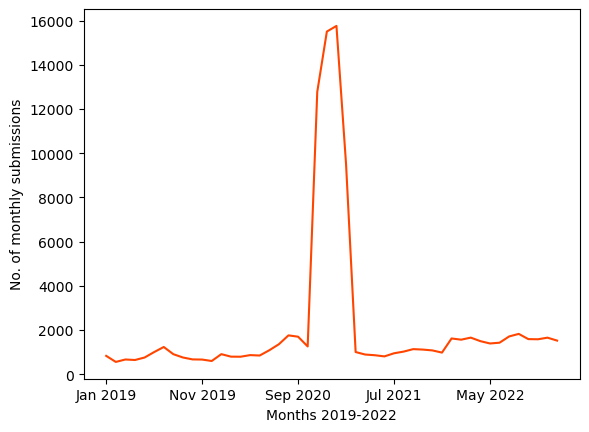

In [109]:
MHomeSubmissions.plot.line(color="#ff4500", xlabel="Months 2019-2022", ylabel="No. of monthly submissions")

In [113]:
HomeSelfText = HomeSubData["selftext"].str.cat(sep="")

In [121]:
stopwords = ["removed", "deleted", "reddit","preview", "redd","https preview", "pjpg", "jpg", "imgur", "width png", "format", "https", "amp", "webp", "auto",]

for word in stopwords:
    HomeSelfText = HomeSelfText.replace(word, "")

In [122]:
HomeDecorating_WordCloud = WordCloud(collocations=True, background_color="white", width=800, height=400).generate(HomeSelfText)

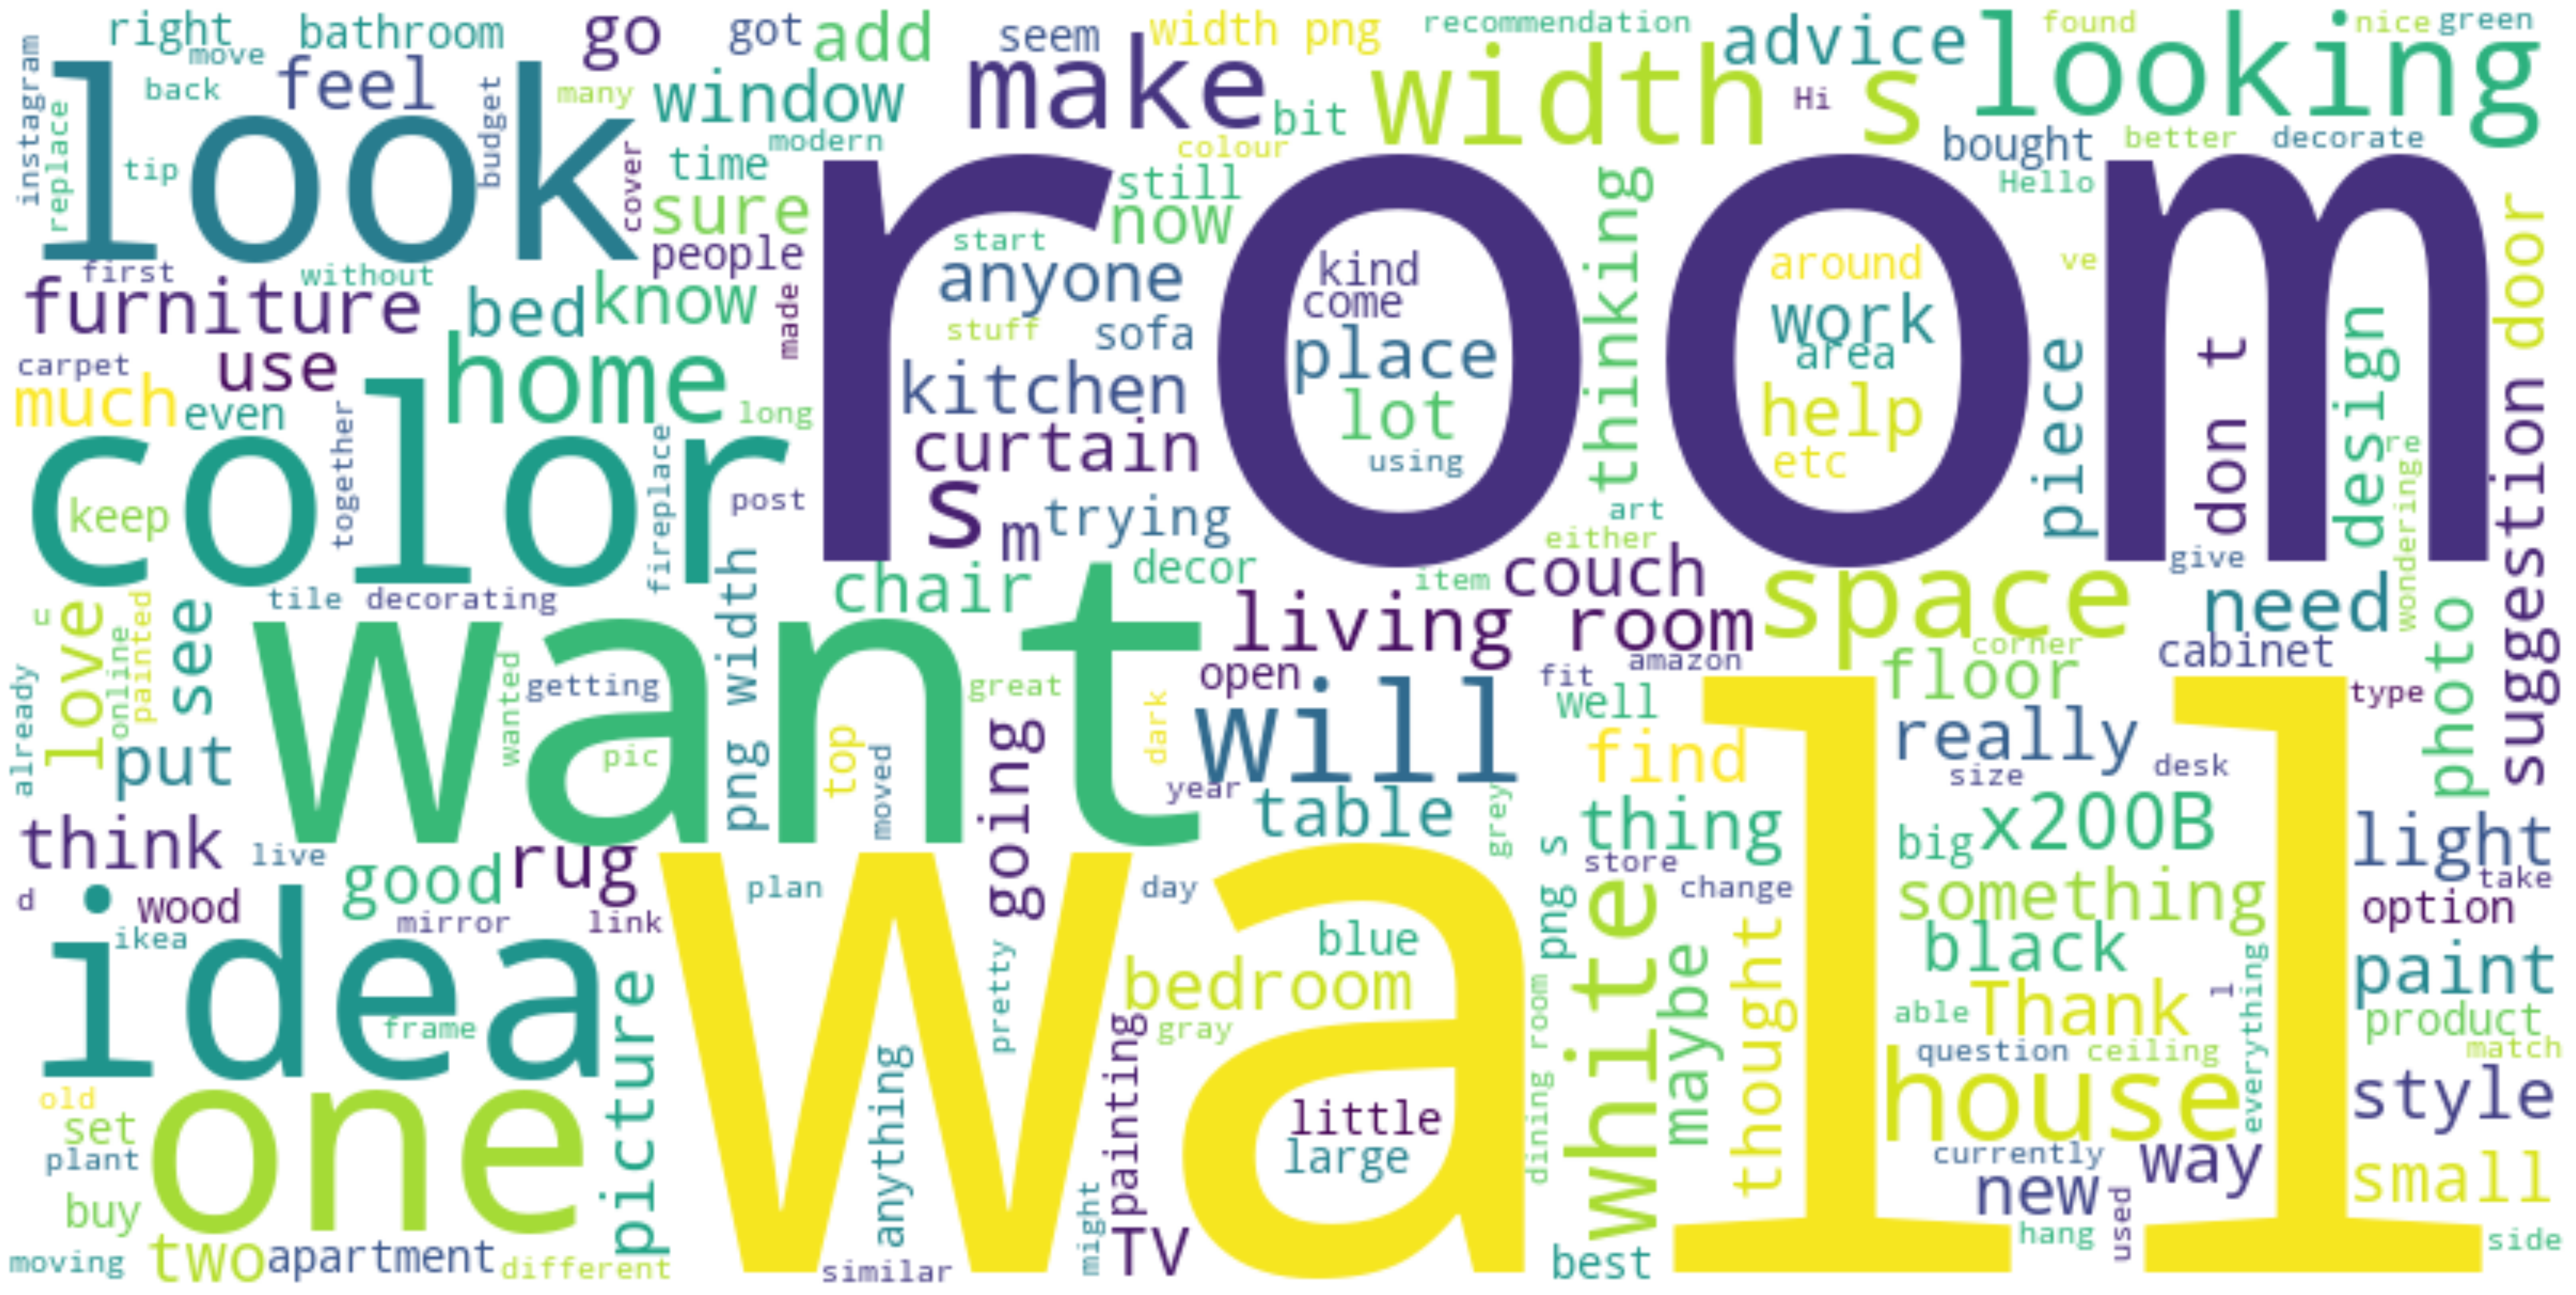

In [123]:
fig2 = plt.figure(figsize = (50, 25))
ax = fig2.add_subplot(111)

ax.imshow(HomeDecorating_WordCloud, interpolation="bilinear")
ax.axis("off")
plt.show()

### Getting Data from SkincareAddiction Comments

In [110]:
SkincareComData = pd.read_table("SkincareComments.tsv", sep='\t', engine='python', quoting=csv.QUOTE_NONE)

In [111]:
SkincareComData.shape

(3105101, 6)

In [112]:
SkincareComData["new_time"] = pd.to_datetime(SkincareComData["created_utc"], errors="coerce")

In [113]:
SComsTableOne = SkincareComData["author"]

In [114]:
SComsTableOne.index = SkincareComData["new_time"]

In [117]:
SComsYearly = SComsTableOne.resample("Y").count()

In [118]:
SComsYearly.index = [2019, 2020, 2021, 2022]

<Axes: xlabel='Year', ylabel='No. of submissions'>

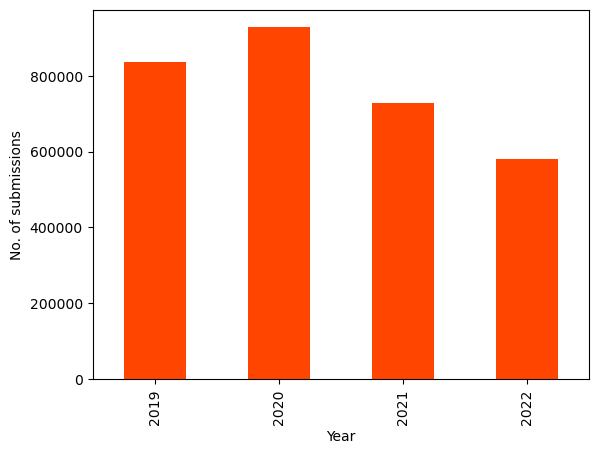

In [119]:
SComsYearly.plot.bar(color="#ff4500", xlabel="Year", ylabel="No. of submissions")

In [120]:
MonthlyComs = SComsTableOne.resample("M").count()

In [121]:
MonthlyComs.index = ["Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019", "Jul 2019", "Aug 2019", "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019", "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "Jul 2020", "Aug 2020", "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021", "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022"]

In [122]:
MonthlyComs

Jan 2019    75847
Feb 2019    71017
Mar 2019    85159
Apr 2019    77828
May 2019    78820
Jun 2019    73897
Jul 2019    70543
Aug 2019    66404
Sep 2019    54052
Oct 2019    60299
Nov 2019    59273
Dec 2019    63631
Jan 2020    80095
Feb 2020    69344
Mar 2020    64548
Apr 2020    80869
May 2020    95842
Jun 2020    82096
Jul 2020    88303
Aug 2020    87037
Sep 2020    74652
Oct 2020    66905
Nov 2020    65624
Dec 2020    72296
Jan 2021    78887
Feb 2021    67600
Mar 2021    73077
Apr 2021    72297
May 2021    65627
Jun 2021    63899
Jul 2021    60404
Aug 2021    57571
Sep 2021    48361
Oct 2021    48203
Nov 2021    45107
Dec 2021    46853
Jan 2022    54649
Feb 2022    49202
Mar 2022    52431
Apr 2022    52031
May 2022    51715
Jun 2022    49739
Jul 2022    52817
Aug 2022    49729
Sep 2022    40613
Oct 2022    42406
Nov 2022    44327
Dec 2022    41643
Name: author, dtype: int64

<Axes: xlabel='Months 2019-2022', ylabel='No. of monthly submissions'>

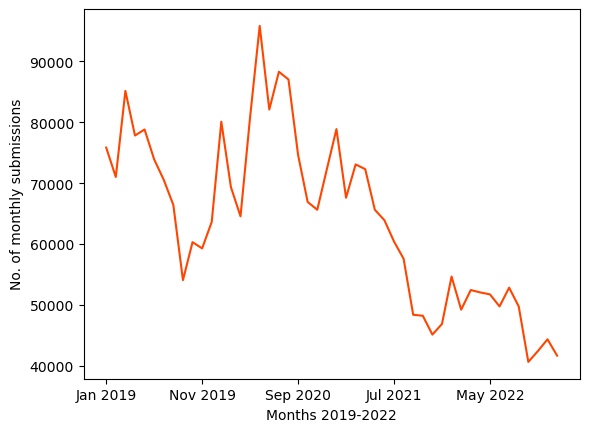

In [123]:
MonthlyComs.plot.line(color="#ff4500", xlabel="Months 2019-2022", ylabel="No. of monthly submissions")

In [82]:
SkincareComData['body'] = SkincareComData['body'].fillna('')

In [83]:
### filtered_data = reddit_data[reddit_data['self-text'].str.contains('|'.join(search_words), case=False)]

In [138]:
search_words = ['recommend', 'use', 'try', "used", "using", "tried","recommendations"]

In [139]:
for word in search_words:
    column_name = f'contains_{word}'
    SkincareComData[column_name] = SkincareComData['body'].str.contains(word, case=False)
    
print(SkincareComData.head(30))

                author created_utc  \
0              antlife  01-01-2019   
1             uGzillaa  01-01-2019   
2           ksswannn03  01-01-2019   
3   mercurioretrogrado  01-01-2019   
4               kmbat6  01-01-2019   
5      spaceindividual  01-01-2019   
6                zkips  01-01-2019   
7               kmbat6  01-01-2019   
8               kmbat6  01-01-2019   
9           INeedsAMap  01-01-2019   
10            kptizzle  01-01-2019   
11              kmbat6  01-01-2019   
12              kmbat6  01-01-2019   
13              kmbat6  01-01-2019   
14       AutoModerator  01-01-2019   
15         shreynashRH  01-01-2019   
16        seasicksteve  01-01-2019   
17         chrstlcharm  01-01-2019   
18      Falling_Spaces  01-01-2019   
19      unspokensmiles  01-01-2019   
20      Falling_Spaces  01-01-2019   
21           markmauss  01-01-2019   
22      Falling_Spaces  01-01-2019   
23               jl216  01-01-2019   
24      Falling_Spaces  01-01-2019   
25          

In [86]:
## SkincareComData["body_recommend"] = SkincareComData['body'].str.contains('|'.join(search_words), case=False)

In [87]:
SkincareComData.head()

author created_utc  \
0             antlife  01-01-2019   
1            uGzillaa  01-01-2019   
2          ksswannn03  01-01-2019   
3  mercurioretrogrado  01-01-2019   
4              kmbat6  01-01-2019   

                                                body    link_id   parent_id  \
0  32 year old male post accutane here. Same situ...  t3_abdtq0  t1_eczpx18   
1  So I leave it on over night, and wash my face ...  t3_abe54q  t1_ed01bt4   
2  Yo if you have acne problems then you should s...  t3_abdtq0   t3_abdtq0   
3  Don't stress too much about your skin or acne ...  t3_abdtq0   t3_abdtq0   
4  No, I appreciate your perspective! I've been c...  t3_ab3zii  t1_ecz5qu8   

        id   new_time  contains_recommend  contains_use  contains_try  
0  ed01woe 2019-01-01               False          True         False  
1  ed01xn7 2019-01-01               False         False         False  
2  ed01yyg 2019-01-01               False         False         False  
3  ed01zln 2019-01-01               False         False         False  
4  ed021wc 2019-01-01               False         False         False

In [155]:
# contains_recommend
# False 2852365
# True 225713

index = []
TrueCol = []
FalseCol = []
TotalCol = []
PercentCol = []

for word in search_words:
    column_name = f'contains_{word}'
    new = SkincareComData[column_name].value_counts()
    
    index.append(column_name)
    TrueCol.append(new[True])
    FalseCol.append(new[False])
    TotalCol.append(new[True] + new[False])
    PercentCol.append(((new[True])/(new[True]+new[False]))*100)
    
data = {'keywords':index, 'True': TrueCol, 'False': FalseCol, '%':PercentCol}

newDF = pd.DataFrame(data)

newDF.head()


keywords    True    False          %
0  contains_recommend  225713  2852365   7.332920
1        contains_use  980974  2097104  31.869693
2        contains_try  370141  2707937  12.025069
3       contains_used  205084  2872994   6.662729
4      contains_using  307572  2770506   9.992339

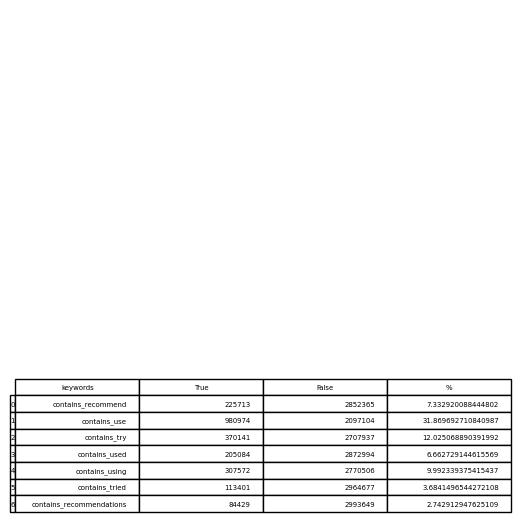

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
# from pandas.plotting.table import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

pd.plotting.table(ax, newDF)  # where df is your data frame

plt.savefig('mytable.png')

In [ ]:
SkinRecComs.to_csv("SkinRecs.csv")

In [ ]:
pd.set_option('display.max_colwidth', None)

### Not processing data from HomeDecorating Comments because the data received lacks "selftext" or "body" almost throughout making it invalid for me. 